In [1]:
# Loading Libraries
import pandas as pd                    # data analysis
import numpy as np                     # scientific calculations
import seaborn as sns                  # Statistical process
import matplotlib.pyplot as plt        # plotting
import statsmodels.api as sm

In [8]:
# Importing data
dp = pd.read_csv(r'C:\Users\patel d d\Desktop\Machine learning\Personal project\Healthcare-Diabetes.csv')

In [9]:
# Understanding data
print(dp)

        Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        1            6      148             72             35        0  33.6   
1        2            1       85             66             29        0  26.6   
2        3            8      183             64              0        0  23.3   
3        4            1       89             66             23       94  28.1   
4        5            0      137             40             35      168  43.1   
...    ...          ...      ...            ...            ...      ...   ...   
2763  2764            2       75             64             24       55  29.7   
2764  2765            8      179             72             42      130  32.7   
2765  2766            6       85             78              0        0  31.2   
2766  2767            0      129            110             46      130  67.1   
2767  2768            2       81             72             15       76  30.1   

      DiabetesPedigreeFunct

In [37]:
dp.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# Understanding data
dp.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# Count the occurrences of each unique value in the dependent variable
value_counts = dp['Outcome'].value_counts()

# Print the counts
print("Count of observations by dependent variable:")
print(value_counts)

Count of observations by dependent variable:
Outcome
0    1816
1     952
Name: count, dtype: int64


In [13]:
# Check for missing values and removing it

print(dp.isnull().sum())

dp.dropna(inplace=True)

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [18]:
# Defining Independent and dependent variables
x = dp.drop(['Id','Outcome','SkinThickness'],axis = 1)
y = dp.Outcome

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(x)
X_test = scaler.transform(x)

In [29]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=4)

In [30]:
# Using statsmodels for detailed model summary

x_train_sm = sm.add_constant(x_train)
logit_model = sm.Logit(y_train, x_train_sm)
result = logit_model.fit()

# Summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.475339
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 1937
Model:                          Logit   Df Residuals:                     1929
Method:                           MLE   Df Model:                            7
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.2647
Time:                        23:17:09   Log-Likelihood:                -920.73
converged:                       True   LL-Null:                       -1252.3
Covariance Type:            nonrobust   LLR p-value:                6.295e-139
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.3198      0.448    -18.562      0.000      -9.198

In [31]:
y_pred = result.predict(sm.add_constant(x_test))

y_pred

965     0.118166
1612    0.412014
333     0.217355
1022    0.310776
802     0.441595
          ...   
125     0.462907
362     0.317771
756     0.496319
2761    0.168465
2667    0.591927
Length: 831, dtype: float64

In [32]:
y_pred_binary = (y_pred >= 0.5).astype(int)
y_pred_binary

965     0
1612    0
333     0
1022    0
802     0
       ..
125     0
362     0
756     0
2761    0
2667    1
Length: 831, dtype: int64

In [33]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_binary)

array([[489,  65],
       [123, 154]])

         Predicted
          0    1
Actual 0  TN   FP
       1  FN   TP
TN (True Negative): The number of true negative predictions (actual class 0, predicted class 0)
FP (False Positive): The number of false positive predictions (actual class 0, predicted class 1)
FN (False Negative): The number of false negative predictions (actual class 1, predicted class 0)
TP (True Positive): The number of true positive predictions (actual class 1, predicted class 1)

In [34]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_binary)

0.7737665463297232

AUC: 0.83


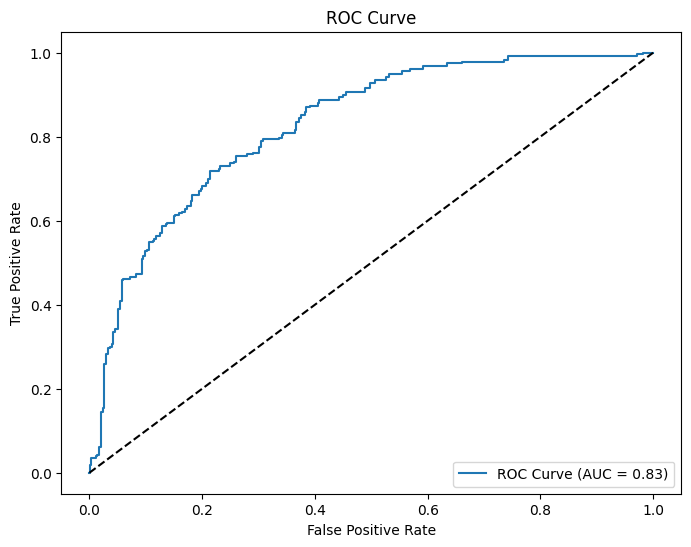

In [35]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
#y_prob = logistic_regression.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc:.2f}')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

ROC Curve (Receiver Operating Characteristic Curve): This is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The ROC curve illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

AUC (Area Under the Curve): This metric summarizes the ROC curve into a single value representing the likelihood that the model will rank a randomly chosen positive instance higher than a randomly chosen negative one.

AUC = 0.5: No discrimination (random guessing)
0.5 < AUC < 0.7: Poor model
0.7 ≤ AUC < 0.8: Fair model
0.8 ≤ AUC < 0.9: Good model
0.9 ≤ AUC < 1: Excellent model

In [40]:
# Prediction on new data

New_patients={'Pregnancies':[3,3,2,5,1],
            'Glucose':[55,62,80,165,110],
            'BloodPressure':[28,44,60,85,100],
            'Insulin':[88,175,230,846,543],
             'BMI':[43.11,50.62,55.2,70.0,40.33], 
             'DiabetesPedigreeFunction':[0.627,0.7,1.22,0.254,2.654], 
             'Age':[35,38,32,50,28]}
df2 = pd.DataFrame(New_patients,columns= [ 'Pregnancies', 'Glucose', 'BloodPressure',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Add constant to the new data (df2)
df2_sm = sm.add_constant(df2)

# Make predictions on the new data
y_pred_new = result.predict(df2_sm)

# Display the predictions
print(y_pred_new)

y_pred_binary_new = (y_pred_new >= 0.5).astype(int)
y_pred_binary_new

0    0.146133
1    0.262123
2    0.522635
3    0.946003
4    0.601058
dtype: float64


0    0
1    0
2    1
3    1
4    1
dtype: int64

In [42]:
# Checking Assumptions: Linearity
# Create a copy of the training data
x_train_trans = x_train.copy()

# Add log-transformed terms for continuous predictors
continuous_vars =[ 'Pregnancies', 'Glucose', 'BloodPressure',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] # Replace with your actual column names
for var in continuous_vars:
    x_train_trans[f'log_{var}'] = np.log(x_train[var] + 1)  # Add 1 to avoid log(0)
    x_train_trans[f'interaction_{var}'] = x_train[var] * x_train_trans[f'log_{var}']

# Add constant column
x_train_trans = sm.add_constant(x_train_trans)

logit_model_interaction = sm.Logit(y_train, x_train_trans)
result_interaction = logit_model_interaction.fit()

# Print summary to check the significance of interaction terms
print(result_interaction.summary())

Optimization terminated successfully.
         Current function value: 0.430672
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 1937
Model:                          Logit   Df Residuals:                     1915
Method:                           MLE   Df Model:                           21
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.3338
Time:                        23:49:51   Log-Likelihood:                -834.21
converged:                       True   LL-Null:                       -1252.3
Covariance Type:            nonrobust   LLR p-value:                1.985e-163
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    6.7631     23.4

If the interaction term is significant, the relationship may not be linear, and you might need a transformation or nonlinear model.

In [44]:
# Checking Assumption: Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable in x_train_sm
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]

# Print the VIF results
print(vif_data)

                   Variable        VIF
0                     const  34.515190
1               Pregnancies   1.415510
2                   Glucose   1.274664
3             BloodPressure   1.155068
4                   Insulin   1.222521
5                       BMI   1.159650
6  DiabetesPedigreeFunction   1.061786
7                       Age   1.592632


Rule of Thumb: VIF > 10 indicates multicollinearity that may require attention.

In [45]:
# Check class distribution
print(dp['Outcome'].value_counts(normalize=True))

Outcome
0    0.656069
1    0.343931
Name: proportion, dtype: float64


If the classes are imbalanced, consider resampling techniques such as oversampling the minority class or using weighted models.